<a href="https://colab.research.google.com/github/tombraganca/Inteligente-Artificial/blob/main/Quarto%20Trabalho%20Pr%C3%A1tico%20sobre%20Redes%20Neurais%20-%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)


In [2]:
# Importando pacotes necessários
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
# Carrega conjunto de dados
dados = pd.read_csv('/content/Hypertensao_Treinamento.txt')
dados.head() # Ver dados Carregados


,Idade,Sexo,Tipo Sanguinio,Fator RH,Colesterol,HDL,Triglicerídeos,Creatinina,Peso (Kg),Altura (cm),Glicemia,Gamma GT,Sódio/Potássio,Classe A+ até F-
0,54,Masculino,A,+,95.2352,438.27,2.468254,149.728732,66,178,32,2.000264,9.1208,A+
1,65,Masculino,A,-,95.9146,444.10,4.318468,371.786259,46,142,46,1.000219,0.8231,C-
2,48,Masculino,B,+,72.0488,735.26,3.592467,792.534537,78,169,166,0.800336,1.5197,D+
3,83,Feminino,O,+,43.9004,892.30,6.606650,941.055245,41,168,76,1.600633,9.6174,B+
4,16,Masculino,B,-,83.8091,95.50,0.912195,448.457138,52,187,29,1.600361,2.4490,B+


In [44]:
def ajustaTabela(table):
 for i in range(len(table)):
    if table.iloc[i,1] == 'Masculino':
        table.iloc[i,1] = 1
    if table.iloc[i,1] == 'Feminino':
        table.iloc[i,1] = 0

    if table.iloc[i,2] == 'A':
        table.iloc[i,2] = 1
    if table.iloc[i,2] == 'B':
        table.iloc[i,2] = 2
    if table.iloc[i,2] == 'AB':
        table.iloc[i,2] = 3
    if table.iloc[i,2] == 'O':
        table.iloc[i,2] = 4

    if table.iloc[i,3] == '+':
        table.iloc[i,3] = 1
    if table.iloc[i,3] == '-':
        table.iloc[i,3] = 0

In [45]:
# Divide em Entrada e Resposta
X = dados.iloc[:,0:13] # Entrada
scaler = StandardScaler() # Normaliza dos Dados

# passar por todas as colunas e transforma 'masculino' em 1 e 'feminino' em 0
ajustaTabela(X)

X.head()

,Idade,Sexo,Tipo Sanguinio,Fator RH,Colesterol,HDL,Triglicerídeos,Creatinina,Peso (Kg),Altura (cm),Glicemia,Gamma GT,Sódio/Potássio
0,54,1,1,1,95.2352,438.27,2.468254,149.728732,66,178,32,2.000264,9.1208
1,65,1,1,0,95.9146,444.10,4.318468,371.786259,46,142,46,1.000219,0.8231
2,48,1,2,1,72.0488,735.26,3.592467,792.534537,78,169,166,0.800336,1.5197
3,83,0,4,1,43.9004,892.30,6.606650,941.055245,41,168,76,1.600633,9.6174
4,16,1,2,0,83.8091,95.50,0.912195,448.457138,52,187,29,1.600361,2.4490


In [48]:
def ajustaTabelaResultado(table):
  for i in range(len(table)):
    if table.iloc[i] == 'A+':
        table.iloc[i] = 1
    if table.iloc[i] == 'A-':
        table.iloc[i] = 2
    if table.iloc[i] == 'B+':
        table.iloc[i] = 3
    if table.iloc[i] == 'B-':
        table.iloc[i] = 4
    if table.iloc[i] == 'C+':
        table.iloc[i] = 5
    if table.iloc[i] == 'C-':
        table.iloc[i] = 6
    if table.iloc[i] == 'D+':
        table.iloc[i] = 7
    if table.iloc[i] == 'D-':
        table.iloc[i] = 8
    if table.iloc[i] == 'E+':
        table.iloc[i] = 9
    if table.iloc[i] == 'E-':
        table.iloc[i] = 10

In [54]:
X = scaler.fit_transform(X)
X # Ver as entradas Normalizadas
Y1 = dados.iloc[:,13] # Resposta
Y1.head()




0    1
1    6
2    7
3    3
4    3
Name: Classe A+ até F-, dtype: object

In [ ]:
ajustaTabelaResultado(Y1)

Y1.head()

In [38]:
# Transforma os dados
Y2 = []

for i in range(len(Y1)):
  linha = []
  for j in range(10):
    if (j+1) == Y1[i]:
      linha += [1]
    else:
      linha += [0]
  Y2.append(linha)
Y = pd.DataFrame(data=Y2,columns=['A+', 'A-', 'B+', 'B-', 'C+', 'C-', 'D+', 'D-', 'E+', 'E-'])

Y.head()

,A+,A-,B+,B-,C+,C-,D+,D-,E+,E-
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [41]:
modelo = Sequential()
modelo.add(Dense(13, input_dim=13, activation='relu'))
modelo.add(Dense(10, activation='sigmoid'))

# Compila o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Treina o Modelo
resultado = modelo.fit(X, Y, batch_size = 400, epochs = 2000)

modelo.summary() # Mostra a rede

Epoch 1/2000
3/3 [==============================] - 1s 5ms/step - loss: 0.7557 - accuracy: 0.0967
Epoch 2/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.7462 - accuracy: 0.0978
Epoch 3/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.7368 - accuracy: 0.0967
Epoch 4/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.7278 - accuracy: 0.0967
Epoch 5/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.7190 - accuracy: 0.0967
Epoch 6/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.7104 - accuracy: 0.0967
Epoch 7/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.7019 - accuracy: 0.0944
Epoch 8/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.0944
Epoch 9/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6857 - accuracy: 0.0933
Epoch 10/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.6779 - accuracy: 0.0933
Epoch 11/2000
3/3 [

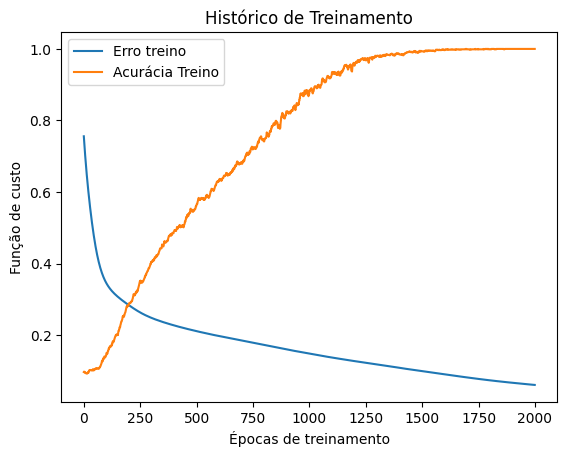

In [42]:
# Mostra Resultado
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['accuracy'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Acurácia Treino'])
plt.show()

In [43]:
# Carrega conjunto de teste
testes = pd.read_csv('/content/Hypertensao_Teste.txt')
testes.head() # Ver testes

,Idade,Sexo,Tipo Sanguinio,Fator RH,Colesterol,HDL,Triglicerídeos,Creatinina,Peso (Kg),Altura (cm),Glicemia,Gamma GT,Sódio/Potássio
0,27,Feminino,AB,+,41.5768,852.58,0.892731,286.676766,64,164,61,2.000863,1.3113
1,64,Feminino,O,-,34.0087,385.61,5.207090,711.427331,41,151,67,2.000023,4.1241
2,85,Feminino,O,+,17.8986,773.54,5.591843,531.001899,86,181,4,2.000794,4.0406
3,80,Feminino,A,-,65.4376,725.19,0.403309,138.208942,42,163,162,1.800022,3.8163
4,90,Feminino,A,+,2.0596,670.06,2.778385,986.478842,45,183,113,1.800594,7.7449


In [50]:
Xtestes = testes.iloc[:,0:13] # Entrada dos Testes
Xtestes # Ver os testes

ajustaTabela(Xtestes)

Xtestes = scaler.fit_transform(Xtestes) # Normaliza dos Testes
Xtestes

array([[-1.46693515, -0.93541435,  0.34099717,  1.        , -0.01688149,
         1.06237279, -1.2848903 , -0.82532386,  0.31375106, -0.01918557,
        -0.55131125,  1.56741921, -1.17296308],
       [ 0.12943545, -0.93541435,  1.36398868, -1.        , -0.28871108,
        -0.56254906,  0.37731268,  0.58352086, -1.21081395, -1.08809602,
        -0.44551592,  1.56595627, -0.13536247],
       [ 1.03548364, -0.93541435,  1.36398868,  1.        , -0.86735062,
         0.78733623,  0.52554735, -0.01492783,  1.77203063,  1.3786204 ,
        -1.55636695,  1.56729891, -0.16616439],
       [ 0.81975788, -0.93541435, -1.70498585, -1.        ,  0.84014623,
         0.61909208, -1.47345103, -1.31777313, -1.14452851, -0.10140945,
         1.22957691,  1.21775917, -0.24890537],
       [ 1.25120939, -0.93541435, -1.70498585,  1.        , -1.43625284,
         0.42725547, -0.55840006,  1.49583246, -0.94567221,  1.54306816,
         0.36558166,  1.21875501,  1.20029748],
       [-0.47459667, -0.935414

In [52]:
# Testa a rede
Y_predito = modelo.predict(Xtestes)
print("Valores Preditos:",Y_predito)
Y_predito1 = np.array([])
Y_Resposta1 = np.array([])
for i in Y_predito:
    Y_parte = ([1 if max(i)==y else 0 for y in i])
    print(Y_parte)
    Y_predito1 = np.concatenate((Y_predito1,Y_parte))
    for j in range(len(Y_parte)):
        if Y_parte[j]==1:
            Resp = ([j+1])
    Y_Resposta1 = np.concatenate((Y_Resposta1,Resp))
Y_Resposta1 # Ver os Resuladados
Y_Resposta = pd.DataFrame(data=Y_Resposta1, dtype=np.int8, columns=['Tipo 1 a 5'])
Y_Resposta # Ver a Resposta


1/1 [==============================] - 0s 86ms/step
Valores Preditos: [[9.90563571e-01 2.25154549e-01 3.04654706e-02 2.91421611e-06
  1.28471084e-12 1.88441215e-18 5.57949416e-28 1.51529209e-21
  1.30918868e-18 5.69326247e-17]
 [9.92876649e-01 2.32367143e-01 2.28016768e-02 2.81067651e-06
  1.21888047e-12 2.07071948e-18 6.48258101e-28 2.23491640e-21
  1.12199771e-18 4.40754256e-17]
 [9.92440343e-01 2.27078021e-01 3.02508492e-02 2.43120508e-06
  1.07812511e-12 2.38893607e-18 4.41534318e-28 1.50491154e-21
  1.21661218e-18 6.74298974e-17]
 [7.35886917e-02 4.71200645e-01 1.29527599e-01 3.80594662e-04
  4.49597559e-09 6.45705498e-15 1.35410272e-22 9.61256829e-18
  8.29744105e-16 1.48290693e-16]
 [2.26994529e-01 4.27939087e-01 1.02045245e-01 2.99736916e-04
  5.81664850e-09 6.40668362e-15 9.94040471e-23 5.04064013e-18
  9.28985820e-16 9.25547608e-16]
 [7.79663399e-02 5.00269234e-01 1.49544418e-01 2.55355815e-04
  2.31334130e-09 7.54963769e-15 1.55526048e-22 9.27893988e-18
  9.74564557e-16 3.16

,Tipo 1 a 5
0,1
1,1
2,1
3,2
4,2
5,2
6,3
7,3
8,3
9,4


In [53]:
# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                -> L{layerNum+1}N{toNeuronNum} = {wgt2}')

0B -> L1N0: 2.770667314529419
0B -> L1N1: 3.941199541091919
0B -> L1N2: -0.3125179409980774
0B -> L1N3: 2.626859188079834
0B -> L1N4: 2.703930377960205
0B -> L1N5: 2.5246424674987793
0B -> L1N6: 2.569957971572876
0B -> L1N7: -0.6758528351783752
0B -> L1N8: 3.099656105041504
0B -> L1N9: 2.366201639175415
0B -> L1N10: 0.7292717099189758
0B -> L1N11: 1.6682887077331543
0B -> L1N12: -1.0967885255813599
L0N0                 -> L1N0 = -1.0814472436904907
L0N0                 -> L1N1 = 0.7971591949462891
L0N0                 -> L1N2 = -0.01700235716998577
L0N0                 -> L1N3 = 0.00048647879157215357
L0N0                 -> L1N4 = -0.020148951560258865
L0N0                 -> L1N5 = 0.00018783177074510604
L0N0                 -> L1N6 = -0.0006732568144798279
L0N0                 -> L1N7 = 0.004163016565144062
L0N0                 -> L1N8 = -0.00016941898502409458
L0N0                 -> L1N9 = -0.0002197339345002547
L0N0                 -> L1N10 = -0.2086423635482788
L0N0             